In [55]:
import tensorflow as tf

In [56]:
from tensorflow.examples.tutorials.mnist import input_data

In [57]:
mnist = input_data.read_data_sets('/tmp/data/',one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [58]:
import matplotlib.pyplot as plt

In [59]:
%matplotlib inline

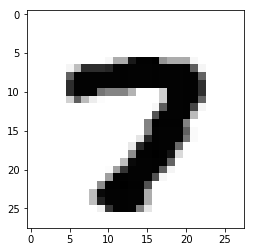

In [60]:
image1 = mnist.train.images[1115].reshape(28,28)
plt.imshow(image1,cmap='Greys')

In [61]:
mnist.train.labels[1115]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [62]:
mnist.train.images.shape

(55000, 784)

In [63]:
input_features = 784 #input number of features
number_of_samples = mnist.train.num_examples #total number of tensors
hidden_1_nodes = 256 #number of perceptron in layer1
hidden_2_nodes = 256 #number of perceptron in layer2
output_classes = 10 #number of items in output

In [92]:
learning_rate = 0.001
no_of_epochs = 15
batchsize = 100

In [65]:
def process_perceptron(input_feature, weights, bias):
    
    # process inputs into layer1
    layer1 = tf.add(tf.matmul(input_feature,weights['layer1']),bias['layer1'])
    layer1 = tf.nn.relu(layer1)
    
    # Process into layer 2
    layer2 = tf.add(tf.matmul(layer1,weights['layer2']),bias['layer2'])
    layer2 = tf.nn.relu(layer2)
    
    # Process into output
    out = tf.add(tf.matmul(layer2,weights['out']),bias['out'])
    return out

In [66]:
weights={'layer1':tf.Variable(tf.random_normal([input_features,hidden_1_nodes])),
 'layer2':tf.Variable(tf.random_normal([hidden_1_nodes,hidden_2_nodes])),
 'out':tf.Variable(tf.random_normal([hidden_2_nodes,output_classes]))}

bias={'layer1':tf.Variable(tf.random_normal([hidden_1_nodes])),
 'layer2':tf.Variable(tf.random_normal([hidden_2_nodes])),
 'out':tf.Variable(tf.random_normal([output_classes]))}

                                        

In [67]:
x = tf.placeholder('float',[None,input_features])
y = tf.placeholder('float',[None,output_classes])

# predict model
prediction = process_perceptron(x,weights,bias)

In [68]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y ,logits= prediction))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [69]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [93]:
for epoch in range(no_of_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0


    # Convert total number of batches to integer
    total_batch = int(number_of_samples/batchsize)

    # Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batchsize)
        _,c = sess.run([optimizer,cost], feed_dict={x: batch_x, y: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
    # Test trained model
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("epoch:"+ str(epoch) + " Cost:" + str(c))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

print('Model Completed with epoch '+ str(no_of_epochs))

epoch:0 Cost:0.0851239
Accuracy: 0.9302
epoch:1 Cost:1.18375
Accuracy: 0.9311
epoch:2 Cost:2.22915
Accuracy: 0.931
epoch:3 Cost:0.717818
Accuracy: 0.9298
epoch:4 Cost:0.0899838
Accuracy: 0.9317
epoch:5 Cost:0.52752
Accuracy: 0.9321
epoch:6 Cost:1.0187
Accuracy: 0.9304
epoch:7 Cost:0.779232
Accuracy: 0.9297
epoch:8 Cost:0.0113454
Accuracy: 0.9308
epoch:9 Cost:0.804971
Accuracy: 0.932
epoch:10 Cost:0.0560992
Accuracy: 0.9308
epoch:11 Cost:0.0539765
Accuracy: 0.9314
epoch:12 Cost:0.524941
Accuracy: 0.9306
epoch:13 Cost:0.248225
Accuracy: 0.931
epoch:14 Cost:0.649932
Accuracy: 0.9309
Model Completed with epoch 15


In [77]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

In [78]:
correct_prediction = tf.cast(correct_prediction, "float")

In [79]:
accuracy = tf.reduce_mean(correct_prediction)

In [80]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.8274


Model Completed with epoch 15
